# Probability for Machine Learning

## 1. Introduction

Probability theory is at the heart of many machine learning techniques — from predicting uncertainty to modelling real-world randomness.

Understanding how probability works allows us to:
- Make **informed predictions** (e.g. classification probabilities)
- **Quantify uncertainty** in models
- Perform **Bayesian inference** for belief updates
- Train models using **likelihood-based methods** (e.g. MLE)

We'll use `numpy`, `scipy`, and `matplotlib` to explore core concepts.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, norm

## 2. Random Variables and Distributions

A **random variable** is a variable that can take different values based on the outcome of a random process.

- **Discrete random variable**: takes distinct values (e.g. 0 or 1)
- **Continuous random variable**: takes values from a continuous range (e.g. height, weight)

Each random variable is associated with a **probability distribution** that describes how likely each value is.

### 2.1 Discrete Example: Bernoulli Distribution

A **Bernoulli** random variable models a binary outcome (e.g. coin flip)

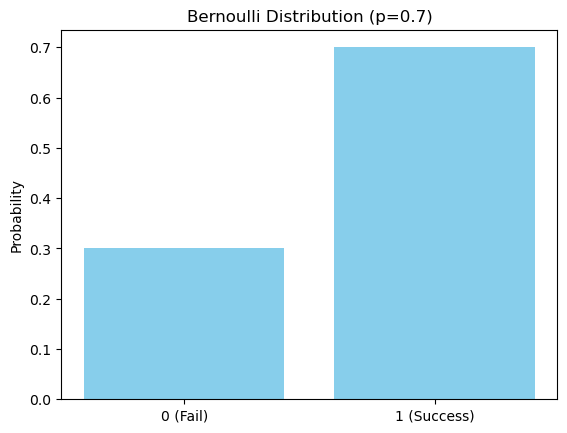

In [6]:
p = 0.7  # Probability of success
x = [0, 1]
probs = bernoulli.pmf(x, p) #probability mass function

plt.bar(x, probs, tick_label=['0 (Fail)', '1 (Success)'], color='skyblue')
plt.title(f'Bernoulli Distribution (p={p})')
plt.ylabel('Probability')
plt.show()

### 2.2 Discrete Example: Binomial Distribution

A **Binomial** distribution models the number of successes in $n$ independent Bernoulli trials.

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

- This gives the probability of getting exactly k successes in n trials.
- The terms mean:
- $\binom{n}{k}$ = “n choose k” = number of ways to choose k successes from n trials
- $p^k$ = probability of those k successes
- $(1-p)^{n-k}$ = probability of the n-k failures
- Example: if you flip a coin 10 times, this tells you how likely it is to get exactly 4 heads.

**Example**
Let’s manually walk through the calculation of the probability of exactly 5 successes out of 10 trials (5 heads in 10 flips) in a binomial distribution with:
- n = 10 trials
- p = 0.5 probability of success on each trial
- k = 5 desired number of successes

For our case:
- $\binom{10}{5}$ = number of ways to choose 5 successes from 10
- $p^5$ = $(0.5)^5$ = probability of getting 5 successes
- $(1 - p)^{5}$ = $(0.5)^5$ = probability of getting 5 failures

**Step 1 Compute $\binom{10}{5}$ - Number of ways to get 5 success**

$\binom{10}{5} = \frac{10!}{5! \cdot (10 - 5)!} = \frac{10!}{5! \cdot 5!} = 252$

**Step 2: Compute $p^5$ and $(1 - p)^5$**

$(0.5)^5 = 0.03125$

So:

$p^5 \cdot (1 - p)^5 = 0.03125 \cdot 0.03125 = 0.0009765625$


**Step 3: Multiply**

$P(X = 5) = 252 \cdot 0.0009765625 = 0.24609375$



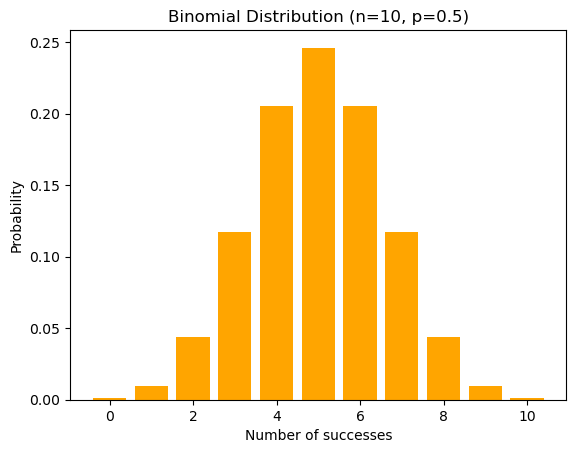

In [10]:
n = 10  # number of trials
p = 0.5 # probability of success for each trail
x = np.arange(0, n+1) # 0 - 10
probs = binom.pmf(x, n, p)

plt.bar(x, probs, color='orange')
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.show()

### 2.3 Continuous Example: Normal Distribution

 **Normal (Gaussian)** distribution is a continuous probability distribution defined by:

- Mean ($\mu$): the centre
- Standard deviation ($\sigma$): the spread

The probability density function (PDF):

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$
- This formula defines the “bell curve”:
- $\mu$ = mean (centre of the peak)
- $\sigma$ = standard deviation (controls width)
- The exponential term makes values further from the mean less likely
- Important: This is a density, not a probability — you integrate over an interval to get an actual probability.

**Real-Life Example: Height of Adults**

Let’s say adult heights are normally distributed with:
- Mean $\mu = 170 cm$
- Standard deviation $\sigma = 10$ cm

We want to find:
- What is the probability that a randomly selected adult is between 160 cm and 180 cm?


**Step-by-Step Calculation**

We’re using the normal distribution probability density function (PDF). But to find the probability between two values, we integrate the PDF — or simply use the cumulative distribution function (CDF):

$P(a \leq X \leq b) = F(b) - F(a)$

Where $F(x)$ is the CDF of the normal distribution.

Example Inputs:
- a = 160, b = 180
- $\mu = 170$, $\sigma = 10$


p: 0.6826894921370859, p_b: 0.8413447460685429, p_a: 0.15865525393145707


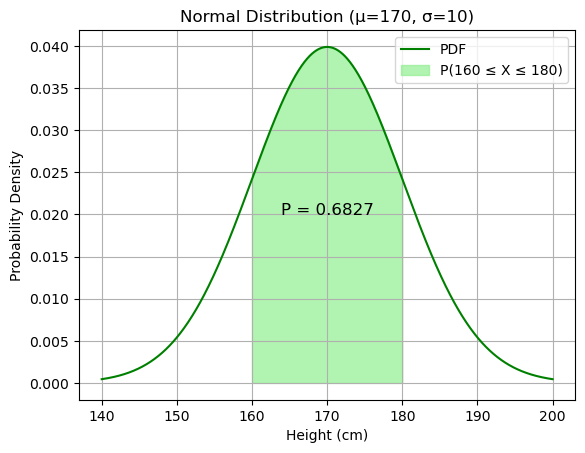

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 170    # mean
sigma = 10  # standard deviation
x = np.linspace(140, 200, 1000)
probs = norm.pdf(x, mu, sigma)

# Define the interval
a, b = 160, 180

# Plot the full PDF
plt.plot(x, probs, label='PDF', color='green')

# Fill the area between a and b
x_fill = np.linspace(a, b, 1000)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='lightgreen', alpha=0.7, label='P(160 ≤ X ≤ 180)')

# Annotate with probability
p_a = norm.cdf(a, mu, sigma)
p_b = norm.cdf(b, mu, sigma)
p =  p_b - p_a

print(f"p: {p}, p_b: {p_b}, p_a: {p_a}")
plt.text(mu, 0.02, f"P = {p:.4f}", ha='center', fontsize=12)

plt.title('Normal Distribution (μ=170, σ=10)')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

What is norm.cdf(x, mu, sigma)?

It returns the cumulative distribution function (CDF) value for a normal distribution at point x:

$P(X \leq x) = \text{CDF}(x)$

For a normal distribution with:
- Mean \mu
- Standard deviation \sigma

the CDF at value x is:

$\text{CDF}(x) = \frac{1}{2} \left[1 + \text{erf}\left(\frac{x - \mu}{\sigma \sqrt{2}} \right)\right]$

where erf is the error function (used to integrate the Gaussian function).

## 3. Probability Rules

In probability theory, several rules help us work with joint and conditional probabilities.
These are fundamental in machine learning, especially for probabilistic models and inference.

### 3.1 Marginal Probability
Probability of a single event, regardless of other variables.

### 3.2 Joint Probability
Probability that **two or more events happen together**:

$$
P(A \cap B)
$$

### 3.3 Conditional Probability
Probability of one event **given** that another has occurred:

$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)}
$$

### 3.4 Product Rule
Rewriting joint probability:

$$
P(A \cap B) = P(A \mid B) \cdot P(B)
$$

### 3.5 Chain Rule
Extending the product rule to multiple variables:

$$
P(A, B, C) = P(A) \cdot P(B \mid A) \cdot P(C \mid A, B)
$$


### 3.6 Example Scenario: Disease Testing
- 1% of people have a rare disease → $P(D) = 0.01$
- Test is 99% accurate:
- If a person has the disease, the test is positive 99% of the time → $P(\text{Pos} \mid D) = 0.99$
- If a person does not have the disease, the test is negative 99% of the time → $P(\text{Neg} \mid \neg D) = 0.99$, so:
- $P(\text{Pos} \mid \neg D) = 0.01$

#### Step 1: Marginal Probability

$P(D) = 0.01 \quad \text{(probability that a random person has the disease)}$



#### Step 2: Joint Probability

What’s the chance that a random person has the disease and tests positive?

$P(\text{Pos} \cap D) = P(\text{Pos} \mid D) \cdot P(D) = 0.99 \cdot 0.01 = 0.0099$

This is the joint probability rule in action.


#### Step 3: Conditional Probability

Now the interesting question:

A person tests positive. What is the probability that they actually have the disease?

This is:

$P(D \mid \text{Pos}) = \frac{P(D \cap \text{Pos})}{P(\text{Pos})}$

We already know:
- $P(D \cap \text{Pos}) = 0.0099$

We now calculate $P(\text{Pos})$, the total chance of testing positive:

$P(\text{Pos}) = P(\text{Pos} \mid D) \cdot P(D) + P(\text{Pos} \mid \neg D) \cdot P(\neg D) \\ = 0.99 \cdot 0.01 + 0.01 \cdot 0.99 = 0.0099 + 0.0099 = 0.0198$

**Final Calculation (Bayes Rule)**

$P(D \mid \text{Pos}) = \frac{0.0099}{0.0198} = 0.5$

So even with a 99% accurate test, if only 1% of people have the disease, and a random person tests positive — they have only a 50% chance of actually having it.

## 4. Bayes' Theorem

Bayes’ Theorem is a fundamental result in probability that lets us update our **beliefs** given new evidence.

### 🧠 Formula

$$
P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}
$$

This says: the probability of $A$ given $B$ is equal to the likelihood of $B$ given $A$, multiplied by the prior probability of $A$, divided by the total probability of $B$.

### 🔍 In ML, Bayes’ Theorem is used to:
- Update model parameters when new data arrives
- Build probabilistic classifiers (e.g. Naive Bayes)
- Perform inference in Bayesian networks

We’ll explore Naive Bayes in more detail in the next section.

## 5. Naive Bayes Classifier

The Naive Bayes classifier is a simple yet powerful algorithm that uses Bayes’ Theorem to make predictions based on observed features.

It is called naive because it assumes all features are independent given the class label — an assumption that is rarely true but often works well in practice, especially in text classification problems.


### Key Idea

We want to compute the probability of a class (e.g. spam) given a set of observed features (e.g. presence of the words “offer” and “click”). Using Bayes’ Theorem:

$P(\text{Spam} \mid \text{features}) = \frac{P(\text{features} \mid \text{Spam}) \cdot P(\text{Spam})}{P(\text{features})}$

In Naive Bayes, we simplify:

$P(\text{features} \mid \text{Spam}) \approx P(\text{feature}_1 \mid \text{Spam}) \cdot P(\text{feature}_2 \mid \text{Spam}) \cdot \ldots$


***Example: Spam Email Classifier***

We have a small dataset of emails with two binary features:
- has_offer_keyword: Whether the email contains the word “offer”
- has_click_link: Whether the email contains a “click here” link

In [1]:
import pandas as pd

# Create a simple training dataset
emails = pd.DataFrame({
    'has_offer_keyword': [1, 0, 1, 1, 0, 0, 1, 0, 0, 1],
    'has_click_link':    [1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
    'is_spam':           [1, 0, 1, 1, 0, 0, 1, 0, 0, 1]
})

### Step 1: Compute Prior Probabilities

$P(\text{Spam}) = \text{fraction of emails that are spam}$


In [3]:
P_spam = emails['is_spam'].mean()
P_not_spam = 1 - P_spam

print(P_spam, P_not_spam)

0.5 0.5


### Step 2: Compute Likelihoods

$P(\text{feature} \mid \text{Spam}) = \text{how often the feature occurs in spam emails}$

In [4]:
P_offer_given_spam = emails[emails['is_spam'] == 1]['has_offer_keyword'].mean()
P_click_given_spam = emails[emails['is_spam'] == 1]['has_click_link'].mean()

P_offer_given_not_spam = emails[emails['is_spam'] == 0]['has_offer_keyword'].mean()
P_click_given_not_spam = emails[emails['is_spam'] == 0]['has_click_link'].mean()

### Step 3: Predict for a New Email

Suppose we have a new email that contains both “offer” and “click”.

To classify it, we compute:

$\text{score}_{\text{Spam}} = P(\text{Spam}) \cdot P(\text{Offer} \mid \text{Spam}) \cdot P(\text{Click} \mid \text{Spam})$

$\text{score}_{\text{NotSpam}} = P(\text{NotSpam}) \cdot P(\text{Offer} \mid \text{NotSpam}) \cdot P(\text{Click} \mid \text{NotSpam})$

In [6]:
# New email features
has_offer = 1
has_click = 1

# Compute unnormalised scores
score_spam = P_spam * P_offer_given_spam * P_click_given_spam
score_not_spam = P_not_spam * P_offer_given_not_spam * P_click_given_not_spam

# Normalize to get posterior probability
P_spam_given_email = score_spam / (score_spam + score_not_spam)

### Intuition
- We look at how likely the features are given each class
- Multiply those with the prior probability of each class
- Normalize the result to get a proper probability

The higher the resulting probability, the more confident the classifier is that the email belongs to that class.

## 6. Expectation and Variance

In probability and statistics, expectation (mean) and variance are two key concepts used to describe the central tendency and spread of a distribution.

They are especially important in machine learning to:

- Measure average outcomes
- Quantify uncertainty
- Define cost functions (e.g. MSE)
- Estimate model parameters

### 6.1 Expectation (Mean)

The expected value (or mean) of a random variable is the average value it would take over many trials.

For Discrete Random Variables:

$\mathbb{E}[X] = \sum_{i} x_i \cdot P(X = x_i)$

For Continuous Random Variables:

$\mathbb{E}[X] = \int_{-\infty}^{\infty} x \cdot f(x)\,dx$

In [4]:
# Example: expected number of heads in 10 coin flips with p = 0.5
from scipy.stats import binom

n = 10  # number of trials
p = 0.5  # probability of success (head)
expected_value = n * p

print(expected_value)

5.0


### 6.2 Variance

The variance measures how spread out the values of a random variable are from the mean.

$\text{Var}(X) = \mathbb{E}[(X - \mathbb{E}[X])^2]$

It is often calculated as:

$\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$

In [3]:
# Variance of a binomial distribution
variance = n * p * (1 - p)

print(variance)

2.5


### 6.3 Summary
- The expected value is used in estimating average predictions, loss functions, and probabilities.
- The variance helps us understand uncertainty, risk, and bias-variance trade-off in model performance.

## 7. Covariance and Correlation


When dealing with two random variables, we often want to know how they move together.


### 7.1 Covariance

The covariance measures how much two variables change together.

$\text{Cov}(X, Y) = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]$
- If Cov(X, Y) > 0: they increase together
- If Cov(X, Y) < 0: one increases while the other decreases
- If Cov(X, Y) = 0: no linear relationship

In [6]:
import numpy as np

# Sample data: study hours vs test scores
x = np.array([2, 3, 5, 7, 9])  # study hours
y = np.array([50, 60, 70, 85, 95])  # scores

# Compute covariance manually
mean_x = np.mean(x)
mean_y = np.mean(y)
cov_xy = np.mean((x - mean_x) * (y - mean_y))

print(f"Covariance between X and Y: {cov_xy}")

Covariance between X and Y: 41.6


### 7.2 Correlation

The correlation coefficient is a normalised version of covariance:

$\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}$

- Always between -1 and 1
- +1 = perfectly positively correlated
- 0 = no correlation
- -1 = perfectly negatively correlated

In [8]:
# Compute correlation manually
std_x = np.std(x)
std_y = np.std(y)
corr_xy = cov_xy / (std_x * std_y)

print(f"Correlation between X and Y: {corr_xy}")

Correlation between X and Y: 0.9958652829763275


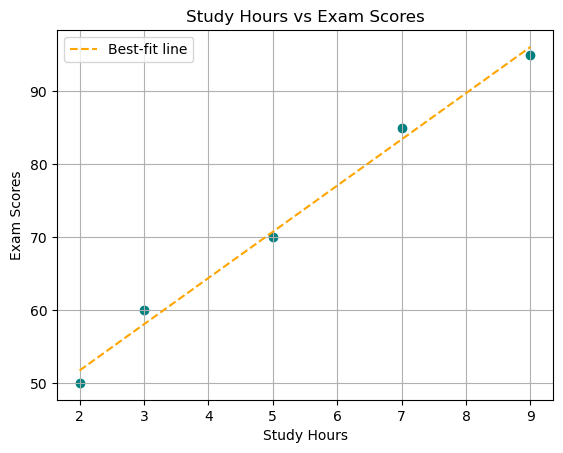

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Study hours vs exam scores
study_hours = np.array([2, 3, 5, 7, 9])
scores = np.array([50, 60, 70, 85, 95])

# Mean-centred
mean_x = np.mean(study_hours)
mean_y = np.mean(scores)

# Covariance calculation
cov_xy = np.mean((study_hours - mean_x) * (scores - mean_y))

# Standard deviations
std_x = np.std(study_hours)
std_y = np.std(scores)

# Correlation coefficient
corr_xy = cov_xy / (std_x * std_y)


# Plotting the relationship
plt.scatter(study_hours, scores, color='teal')
plt.title('Study Hours vs Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')

# Add best-fit line
m, b = np.polyfit(study_hours, scores, 1)
plt.plot(study_hours, m * study_hours + b, color='orange', linestyle='--', label='Best-fit line')

plt.legend()
plt.grid(True)
plt.show()

### 7.3 Summary

- Covariance tells us about direction of joint movement
- Correlation tells us about strength and direction (on a standardised scale)
- Helps detect multicollinearity, redundant features, or relationships between input and - 